# Lab 1: Introduction to Genomics

### Name: zicheng5

### Due March 11, 2021 11:59 PM

Lab 1 contains an introductory exploration of genomic data.

## Important Instructions - 

1. You are not allowed to use any in-built libraries for processing DNA sequencing data files
2. Please implement all the *graded functions* in main.py file. Do not change function names in main.py.
3. Please read the description of every graded function very carefully. The description clearly states what is the expectation of each graded function. 
4. After some graded functions, there is a cell which you can run and see if the expected output matches the output you are getting. 
5. The expected output provided is just a way for you to assess the correctness of your code. The code will be tested on several other cases as well.

#### Preamble (Don't change this)

In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring an Illumina *E. coli* dataset

First, let's look at the data in the file ``ecoli.fastq``.
It contains reads generated using an Illumina sequencing machine from the *E. coli* genome.

In [2]:
#reading Illumina fastq data

reads=""
with open("ecoli.fastq") as file:
    reads=file.read()

FASTQ is a standard file format for genomic data. See the wikipedia [article](https://en.wikipedia.org/wiki/FASTQ_format).
Let's look at the first 1000 characters:

In [7]:
print(reads[:1000])
print(len(reads))

@HISEQ03:379:C2WP8ACXX:7:1101:4288:2189 1:N:0:ACTTGA
TATTCAATTCAGACTACAGAGTGGGCGATTTTAATCTATGGACTGGTGATGATCTTCTTTTTATACATGTATGTTTGCTTCGCGTCGGCGGTTTATATCCCGGAGCTTTGGCCAACGCATTTACGCCTGCGCGGTTCGGGTTTCGTTAAT
+
CCCFFFFFHHHHHJJJJJJGIEFHJJJHIJJJJJJJJJJJJGHGJJFCEEGGIIHIIJJJJJIIIIIJJIJJJHHHFHHHFFFDDDDDDDD>>BCDEECDDDDBDDDDDCCDCDDDDDBB@DCDDDDDDDDDDDBDBBBB2<<>??CBDD
@HISEQ03:379:C2WP8ACXX:7:1101:4288:2189 2:N:0:ACTTGA
CACCGTGATCGACCCATAATGTGTTAATAATGCCGCAACGCCATAGGGCGTGAAGACTGCGACGATCCGTCCGACGGCATTAACGAAACCCGAACCGCGCAGGCGTAAATGCGTTGGCCAAAGCTCCGGGATATAAACCGCCGACGCGAA
+
CCCFFFFFHHHHHJJJJJJJJHHHIJJJJJIIJJJJIJJJJJIJIJJJJHFDFFFFEEEEDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDBDBDDDDBDDDDBBDD@DDDBBDDDDDDCDCCDDDDDB>CCDDED@BDDD9<<BB79
@HISEQ03:379:C2WP8ACXX:7:1101:4591:2228 1:N:0:ACTTGA
AATTAAAAGACACCCAGCAGTTACAAAAGTGCGCTGATCGTCTTGCCCAGAGTGCGCAGGATTTTCGTCTGCAACTCGGTGAGCCAGGTTATCGCGGTAACCTGCGTGAGCTGTTAGCTAATCCGCAAATTCAGCGGGCATTTTTACTGC
+
@@@=BDDD???ACCF?HIBD<FAHIDDHE@E@G8:66?9DFHD7F8=F3===).75;@EH=?3;);>A=@?(>AC:><?,

Every block of four lines corresponds to one read:
1. Line 1 (starting with @) is a read ID
2. Line 2 is the DNA sequence
3. Line 3 usually only has a + sign
4. Line 4 has the same length as the DNA sequence. Each characters encodes the quality (or the reliability) of the corresponding symbol in the DNA sequence

In [9]:
%run main.py

The following line creates an object from the class in *main.py*. **Do not change the class name and function headers!**

In [10]:
module = Lab1()

## Graded function 1: parse_reads_illumina(reads) (10 marks)

Purpose - To parse the input read file and get a list of DNA reads.

Input - a string (``reads``) which contains the entire reads file. You should begin by first obtaining individual lines of the file. Each DNA read corresponds to the second line of each block of four lines.

Output - a list of DNA reads

#### Example Output Format - ['ACGTGGGTAAACC', 'ACGTGGGAACC', 'GTGGGTAAACC']

In [30]:
%run lmz.py
module = Lab1()

dna_reads_illumina=module.parse_reads_illumina(reads)
print(len(dna_reads_illumina))
print(dna_reads_illumina[0]=="TATTCAATTCAGACTACAGAGTGGGCGATTTTAATCTATGGACTGGTGATGATCTTCTTTTTATACATGTATGTTTGCTTCGCGTCGGCGGTTTATATCCCGGAGCTTTGGCCAACGCATTTACGCCTGCGCGGTTCGGGTTTCGTTAAT")
print(dna_reads_illumina[1]=="CACCGTGATCGACCCATAATGTGTTAATAATGCCGCAACGCCATAGGGCGTGAAGACTGCGACGATCCGTCCGACGGCATTAACGAAACCCGAACCGCGCAGGCGTAAATGCGTTGGCCAAAGCTCCGGGATATAAACCGCCGACGCGAA")

644022
True
True


### Expected Output - 

644022

True

True

## Graded Function 2: unique_lengths(dna_reads) (10 marks)

Purpose - To return a set of all read lengths among all the DNA reads

Input - list of DNA reads

Output - set which contains different read lengths

#### Example Output Format - {123,156,167}

In [31]:
%run lmz.py
module = Lab1()

counts_illumina=module.unique_lengths(dna_reads_illumina)
print(counts_illumina)

{150}


Next we will look into the content of the actual reads. Are A, C, G, and T the only characters in the reads?

## Graded Function 3 : check_impurity(dna_reads) (10 marks)

Purpose - To check if reads have any characters apart from the 4 defined above.

Input - list of DNA reads.

Output - you should output a list of all reads which contain any non-{A,C,G,T} characters and a set containing all the additional characters encountered.

#### Example Output Format - 

List of reads with impurities - ['ACGTGGGBAAACC', 'ACDDGGGAACC', 'GTGGGTAABDC']

Set with additional characters - {'B','D'}

In [45]:
%run main.py
module = Lab1()

impure_reads_illumina,impure_chars_illumina=module.check_impurity(dna_reads_illumina)
print(len(impure_reads_illumina))
print(impure_chars_illumina)

1368
{'N'}


The symbol N is used to represent undetermined bases (i.e., bases where the sequencing machine failed to obtain a proper reading)

## Graded Function 4 : get_read_counts(dna_reads) (10 marks)

Purpose - To compute the number of times each read occurs in the entire collections of reads.

Input - list of DNA reads

Output - you should output a dictionary where the read is the key and the number of times it appears is the value. 

#### Example Output Format - {'ACGTGGGTAAACC' : 15, 'ACGTGGGAACC' : 10, 'GTGGGTAAACC' : 5}

In [34]:
%run lmz.py
module = Lab1()

reads_counts_illumina=module.get_read_counts(dna_reads_illumina)
print(sorted(list(reads_counts_illumina.values()),reverse=True)[:5])
print(len(reads_counts_illumina.keys()))

[11, 7, 7, 6, 6]
616342


### Plotting read frequencies

We will now use the count dictionary from above to generate a histogram of counts vs no. of reads with that count(log scale)

In [21]:
def plot_frequency_histogram(read_counts) :
    plt.yscale('log', nonpositive='clip')    
    plt.hist([read_counts[key] for key in read_counts],bins=[i for i in range(13)])
    plt.xlabel("count values")
    plt.ylabel("no. of reads")
    plt.show()

ValueError: provided too many kwargs, can only pass {'basex', 'subsx', nonposx'} or {'basey', 'subsy', nonposy'}.  You passed {'nonpositive': 'clip'}

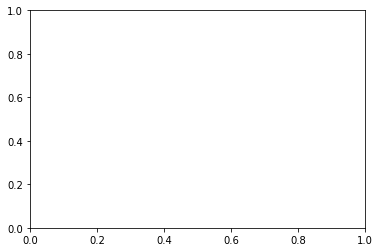

In [22]:
plot_frequency_histogram(reads_counts_illumina)

Notice that most reads appear only once, and it is rare for the same read to appear many times.
This is expected, since the reads are drawn roughly uniformly at random from the whole genome.

## Exploring a PacBio *E. coli* dataset

Next, we will look into a read dataset obtained using a Pacific Biosciences (PacBio) machine, from the same *E. coli* genome.

In [23]:
#reading PacBio data
reads_pac=""
with open("ecoli_pac-bio.fasta") as file :
    reads_pac=file.read()

As in the case of the Illumina dataset, let's look at the beginning of the file:

In [24]:
print(reads_pac[:2000])

>m140930_121059_sherri_c100688052550000001823139503241542_s1_p0/24/0_7424 RQ=0.846
aaaaaaaaaaaaaaaaacaaaaaaaaaaaaaaaaaaaaagggggggggggggaaaggaggggaaaagaaaaaaaaaaaaa
aaaaaaaaaaaaaattgggggcccccccccaaaaaggaaaaattctctttttcaaacaaaaaacggtgttttttttctgg
gtggtttgggggcgaaaataaatcgcttcctttgtcttttggggccccactcctttcttcgatcagcgttttgccagcaa
aacgcaattttttttttttctttcgttttttagaagggtaaagaaacagctttcttttctttaaataggttttggccccg
tttttttcctgtttccggttccacttcaatatattttcgccattgtttccatctgcttccgaaacgccagttttcacgta
ccccggtatcgcaagcgtggcggaggaaacagccatgtttgaggcgctggtttgcaggcggcatacggcgggaacagcca
gcggatatctttaataaagcgcagaaatcgtaacaatgcgatcggcttcgtccagtaccacgcacctgaatggcacgcga
ggtttaatgtggttctgcttggcggtagtcattaagagccccgtggtggccaatcaagaaaatgtcacgccgcttcccag
cactttcagctgttttgtcgtagcccatcaccaccgtaagccaagacccagcttcaggccaagtagccttccgccagcgg
ttctgcgtcggcatggattctgcacggcaaagttcacgcgtcggtttgccataattaaggacgcgcctggattcaccttg
cgatcggcaatcgcaggaatgagagagcagataatgaaagcgttgacgtaagaaagccatcgttttcccggtaccggttt
ttgcgcctgcccggctacgtcagcga

Unlike the Illumina file, which was in the FASTQ format, this one is in the FASTA format.
The FASTA format is simpler.
Each line starting with a '>' contains the read ID.
After that, many lines may follow, with the content of a single read.

## Graded Function 5: parse_reads_pac(reads) (10 marks)

Purpose - To parse the input read file and obtain a list of DNA reads.

Input - a string which contains the entire PacBio reads file. You should begin by first getting individual lines of the file. Every two reads are separated by a line which begins with '>'. Note that reads can span across several lines in this case as opposed to single line reads in the Illumina file.

Output - a list of DNA reads

#### Example Output Format - ['ACGTGGGTAAACC', 'ACGTGGGAACC', 'GTGGGTAAACC']

In [35]:
%run lmz.py
module = Lab1()

dna_reads_pac=module.parse_reads_pac(reads_pac)
print(len(dna_reads_pac))
for i in range(10,15) :
    print(len(dna_reads_pac[i]))

1004
19944
21731
21133
13502
8134


### Expected Output - 

1004

19944

21731

21133

13502

8134

Notice that, unlike the Illumina dataset, the PacBio data has reads of very different lengths, and some of the reads are very long.

## Plotting the distribution of read lengths

In [26]:
#getting distribution of length of reads
lengths_pac=[]
for read in dna_reads_pac :
    lengths_pac.append(len(read))

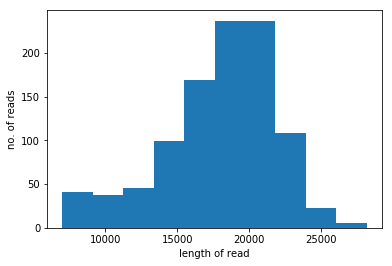

In [27]:
plt.hist(lengths_pac)
plt.xlabel("length of read")
plt.ylabel("no. of reads")
plt.show()

## Checking for impurity symbols

We will now check if the PacBio dataset has any reads that contain any symbols apart from {A,C,G,T}

In [28]:
impure_reads_pac,impure_chars_pac=module.check_impurity(dna_reads_pac)

In [29]:
print(len(impure_reads_pac))
impure_chars_pac

18062836


{'a', 'c', 'g', 't'}